In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..") 
import stockcorr as sc 
from networkx.algorithms import community
import sklearn.cluster as cluster


In [8]:
## Makes so that there is no output


## Read in data
stock_df = pd.read_csv('../../data/stock_market_data/stockdf.csv')


## Convert date to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])


## find first date of every year in the stockdf

first_date = stock_df['Date'].dt.year.drop_duplicates()

## split the stockdf into dataframes, one for each year

dataframes_ = [stock_df[stock_df['Date'].dt.year == year] for year in first_date]
dataframes_ = [df.set_index('Date') for df in dataframes_]
corr_list = []
for i in dataframes_:
    curr_ = sc.get_corr_matrix(i, 0.9)
    ## make every value to 1 if above 0
    curr_ = np.where(curr_ > 0, 1, 0)
    corr_list.append(curr_)

## sum all correlation matrices in corr_list

total_sum = sum(corr_list)




calculating corr matrix
A has 884701 nan values
calculating corr matrix
A has 856541 nan values
calculating corr matrix
A has 829984 nan values
calculating corr matrix
A has 778072 nan values
calculating corr matrix
A has 709273 nan values
calculating corr matrix
A has 557527 nan values
calculating corr matrix
A has 512382 nan values
calculating corr matrix
A has 397991 nan values
calculating corr matrix
A has 285840 nan values
calculating corr matrix
A has 184634 nan values
calculating corr matrix
A has 120634 nan values
calculating corr matrix
A has 107794 nan values
calculating corr matrix
A has 121689 nan values
calculating corr matrix
A has 94235 nan values
calculating corr matrix
A has 124344 nan values
calculating corr matrix
A has 110027 nan values
calculating corr matrix
A has 64869 nan values
calculating corr matrix
A has 85581 nan values


In [9]:
## create graph from total_sum with weighted edges
G = nx.from_numpy_matrix(total_sum)


# communities = community.greedy_modularity_communities(G)
#     #position by community
# colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'brown', 'orange', 'purple' ]

# setLst = list(communities)
# plt.figure(figsize = (50,30))
# for index, sg in enumerate(setLst):
#     #draw with orange color text
#     print(index)
#     pos = nx.spring_layout(G.subgraph(sg))
#     nx.draw(G.subgraph(sg), pos= pos, node_color= colorlist[index % 7], with_labels=True)
# plt.show()


# G.remove_nodes_from(list(nx.isolates(G)))
# pos = nx.spring_layout(G)
# colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'brown', 'orange', 'purple' ]
# wcc = nx.connected_components( G )
# setLst = list(wcc) 
# len(setLst)
# plt.figure(figsize = (50,30))
# for index, sg in enumerate(setLst):
#     #draw with orange color text
#     nx.draw(G.subgraph(sg), pos= pos, node_color= colorlist[index % 7], with_labels=True, font_size=20)
# plt.show()

In [12]:
corr_, total_sum,X = cw.split_into_years()
corr_

calculating corr matrix
A has 884701 nan values
calculating corr matrix
A has 856541 nan values
calculating corr matrix
A has 829984 nan values
calculating corr matrix
A has 778072 nan values
calculating corr matrix
A has 709273 nan values
calculating corr matrix
A has 557527 nan values
calculating corr matrix
A has 512382 nan values
calculating corr matrix
A has 397991 nan values
calculating corr matrix
A has 285840 nan values
calculating corr matrix
A has 184634 nan values
calculating corr matrix
A has 120634 nan values
calculating corr matrix
A has 107794 nan values
calculating corr matrix
A has 121689 nan values
calculating corr matrix
A has 94235 nan values
calculating corr matrix
A has 124344 nan values
calculating corr matrix
A has 110027 nan values
calculating corr matrix
A has 64869 nan values
calculating corr matrix
A has 85581 nan values


[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
   

In [17]:
stockdf = pd.read_csv('./../data/stock_market_data/stockdf.csv')

corr_df = sc.get_corr_matrix(stockdf)

corr_df = np.where(np.isfinite(corr_df), corr_df, 0)


calculating corr matrix
A has 2294 nan values


In [93]:
## make corr_df into a graph
G = nx.from_numpy_matrix(corr_df)

A = nx.to_scipy_sparse_array(G)


clustering = AP(max_iter=1000,).fit(A)

In [88]:
cols = stockdf.columns

In [89]:
center_tickers = cols[clustering.cluster_centers_indices_]

center_stocks = stockdf[center_tickers]

center_stocks.corr()

,A,AAALY,AACAY,AAL,AAP,AAPL,ABBV,ABC,ABLT,ABT,...,YFGSF,YMDAF,YUM,YWGRF,ZBH,ZIJMF,ZION,ZNH,ZSHGY,ZTS
A,1.000000,-0.105557,-0.021987,0.043375,0.810568,0.971801,0.873068,0.841602,-0.406890,0.973970,...,-0.694921,-0.608124,0.929698,-0.726230,0.810433,0.718718,0.240159,0.397924,0.954236,0.969354
AAALY,-0.105557,1.000000,0.362700,0.505361,0.200395,-0.142618,0.095376,0.194738,0.177498,-0.125879,...,0.132431,-0.279571,0.071596,0.257683,0.045107,-0.135978,0.240015,0.606435,-0.385421,-0.083528
AACAY,-0.021987,0.362700,1.000000,0.720165,0.003007,-0.154051,-0.043930,0.102224,0.345907,-0.066377,...,0.468060,-0.403840,0.064353,0.057247,0.332830,-0.249423,0.326716,0.599124,-0.372455,-0.271268
AAL,0.043375,0.505361,0.720165,1.000000,0.292381,-0.065198,-0.337592,0.301022,0.476508,0.021340,...,0.481565,-0.272723,0.120842,0.549547,0.428513,-0.438901,0.493124,0.309124,-0.787139,-0.599613
AAP,0.810568,0.200395,0.003007,0.292381,1.000000,0.785842,0.612438,0.945784,-0.283091,0.824837,...,-0.623222,-0.839851,0.891827,-0.131515,0.843481,0.340684,-0.009083,0.513849,0.580973,0.667364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIJMF,0.718718,-0.135978,-0.249423,-0.438901,0.340684,0.759415,0.826793,0.406138,-0.534376,0.647010,...,-0.706605,0.040619,0.516492,-0.548588,0.275005,1.000000,0.496441,0.020439,0.890154,0.876429
ZION,0.240159,0.240015,0.326716,0.493124,-0.009083,0.181397,0.837432,0.023963,-0.081635,0.189086,...,-0.544707,0.219105,0.069217,-0.730061,0.264246,0.496441,1.000000,-0.067060,0.684437,0.745157
ZNH,0.397924,0.606435,0.599124,0.309124,0.513849,0.329144,0.245976,0.563856,0.270676,0.395255,...,0.287925,-0.454365,0.540201,-0.004801,0.513618,0.020439,-0.067060,1.000000,-0.135529,0.053955
ZSHGY,0.954236,-0.385421,-0.372455,-0.787139,0.580973,0.931327,0.803669,0.636032,-0.503001,0.955679,...,-0.622805,-0.106658,0.875541,-0.748409,0.639995,0.890154,0.684437,-0.135529,1.000000,0.953274


In [4]:
# heatmap of the center stocks
import seaborn as sns
import matplotlib.pyplot as plt

center_stock_corr = center_stocks.corr()

avg_corr = center_stock_corr.mean()
avg_base = np.mean(corr_df, axis=0)
np.min(avg_corr)

In [80]:
# Find index of clusters
clustering.cluster_centers_indices_

array([  41,   49,   74,   96,  150,  198,  254,  291,  303,  379,  381,
        391,  408,  418,  419,  515,  529,  540,  556,  569,  636,  644,
        651,  705,  726,  768,  771,  773,  785,  796,  805,  812,  822,
        830,  865,  879,  885,  901,  905,  957,  958, 1006, 1007, 1062,
       1077])

In [111]:
## Find all the clusters of clsutering
print(clustering.cluster_centers_indices_)

print(clustering.cluster_centers_)

## Find labels of each node in each cluster
clustering.labels_

[  41   49   74   96  150  198  254  291  303  379  381  391  408  418
  419  515  529  540  556  569  636  644  651  705  726  768  771  773
  785  796  805  812  822  830  865  879  885  901  905  957  958 1006
 1007 1062 1077]
  (0, 0)	0.42315308327695295
  (0, 1)	0.16039100743703322
  (0, 2)	0.06869440469900749
  (0, 3)	0.11782821402393784
  (0, 4)	0.42786780404419045
  (0, 5)	0.4329768783639659
  (0, 6)	0.5098622777721928
  (0, 7)	0.4773366275176938
  (0, 8)	-0.15680054343213337
  (0, 9)	0.3450588351475687
  (0, 10)	-0.06879201612366048
  (0, 11)	0.08062240006565526
  (0, 12)	-0.07585577757468073
  (0, 13)	-0.25834416666386767
  (0, 14)	-0.06340622811447923
  (0, 15)	0.34695963723876655
  (0, 16)	0.0843197699929318
  (0, 17)	0.44305964551384663
  (0, 18)	0.4277114693040124
  (0, 19)	0.16733442874844076
  (0, 20)	0.16823452073628603
  (0, 21)	0.4033677316334046
  (0, 22)	0.5885433037809316
  (0, 23)	0.4101013498734359
  (0, 24)	0.2772985809708233
  :	:
  (44, 1054)	-0.6301983939819

array([30, 13, 16, ..., 44, 44,  2])

In [135]:
from sklearn import covariance

G = nx.from_numpy_matrix(corr_df)

## give the nodes a label
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), stockdf.columns)))


A = nx.to_scipy_sparse_array(G)


clusters = cluster.AffinityPropagation().fit(A)

  (0, 1)	-0.1055568517470077
  (0, 2)	-0.021987012590072096
  (0, 3)	0.043375227128948535
  (0, 4)	0.8105684290517843
  (0, 5)	0.9718007916591248
  (0, 6)	0.8730682416250697
  (0, 7)	0.8416022864137294
  (0, 8)	-0.40689039023127804
  (0, 9)	0.9739695174754384
  (0, 10)	-0.6305182042650764
  (0, 11)	-0.2966126499259049
  (0, 12)	0.3529369315868824
  (0, 13)	-0.7267364424011576
  (0, 14)	-0.519341326122139
  (0, 15)	0.8909386328154509
  (0, 16)	-0.3165363703552476
  (0, 17)	0.9839661453162645
  (0, 18)	0.8540630783224051
  (0, 19)	0.8645898367559203
  (0, 20)	-0.41480359272358364
  (0, 21)	0.9832860851194777
  (0, 22)	0.8144487889912442
  (0, 23)	0.9572939642649395
  (0, 24)	0.9662033603721873
  (0, 25)	0.455039588477491
  :	:
  (1079, 1054)	-0.2878450003361882
  (1079, 1055)	0.6738911463321553
  (1079, 1056)	0.8844951656694332
  (1079, 1057)	0.41017146544833805
  (1079, 1058)	-0.28605014534204415
  (1079, 1059)	-0.15458896670807973
  (1079, 1060)	0.28083621123606656
  (1079, 1061)	0.855

In [129]:
n_labels = clusters.labels_.max()

print(stockdf.columns)
symbols= np.array(stockdf.columns).T
for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(symbols[clusters.labels_ == i])}")



Index(['A', 'AAALY', 'AACAY', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABLT',
       'ABT',
       ...
       'YMDAF', 'YUM', 'YWGRF', 'ZBH', 'ZIJMF', 'ZION', 'ZNH', 'ZSHGY', 'ZTS',
       'ZURVY'],
      dtype='object', length=1080)
Cluster 1: AEHR, AIAGF, AMKBY, ARCC, BAESY, BCMXY, CLPXY, CMWAY, COP, CSIQ, DCNSF, GME, GTWCF, JNPR, JRONY, KBDCY, MAHMF, MSLOF, ORMP, PBA, PINC, SBKFF, SCPJ, SJR, SVTRF, TCLCF, THC, TONPF, TX
Cluster 2: ACFL, AGNC, AKBTY, ALR, CMHHF, CPCAY, CPYYF, CS, EDRWY, HNLGF, NLY, RIG, RMGOF, SINGY, SMEBF, SWRBY, TEF
Cluster 3: AAPL, ACN, ADP, AIZ, AJG, AMGN, AON, AZN, AZO, BRK-A, CHD, CHRW, CHT, CINF, CME, CNI, COST, CP, DE, DLMAF, ES, EW, EXR, FAST, HRL, HUM, JBHT, JNJ, KFRC, KLAC, LLY, LNT, LYV, MAA, MCD, MDLZ, MMC, MOH, MSFT, MSI, MTRAF, NEE, ORLY, PAYX, PEG, PEP, PG, PLD, RJF, RS, RSG, SO, SZLMY, TMO, TRI, TSCO, UNH, UNP, WCN, WEC, WM, WTKWY, XEL, ZURVY
Cluster 4: AHII, ATONF, AUTR, BPCGF, CGKEY, CIMDF, COL, CSSI, CSWYY, CYH, EFGXY, GARPF, HCMLY, HNTIF, HPIL, JAPA

In [6]:
sys.path.append("../../data_clean/")
import newClean as nc

ModuleNotFoundError: No module named 'newClean'

In [238]:
year = 2015

df_years, min_year, max_year = nc.
corr_df = get_corr_from_year()


In [239]:
np.isnan(corr_df).any()

True

In [237]:
from sklearn import covariance

G = nx.from_numpy_matrix(corr_df)

## give the nodes a label
# G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())), stockdf.columns)))


A = nx.to_scipy_sparse_array(G)


clusters = cluster.AffinityPropagation().fit(A)


ValueError: Input X contains NaN.
AffinityPropagation does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

max index 54
amount of clusters 55
average of all clusters 54.89090909090909


<Figure size 432x288 with 0 Axes>

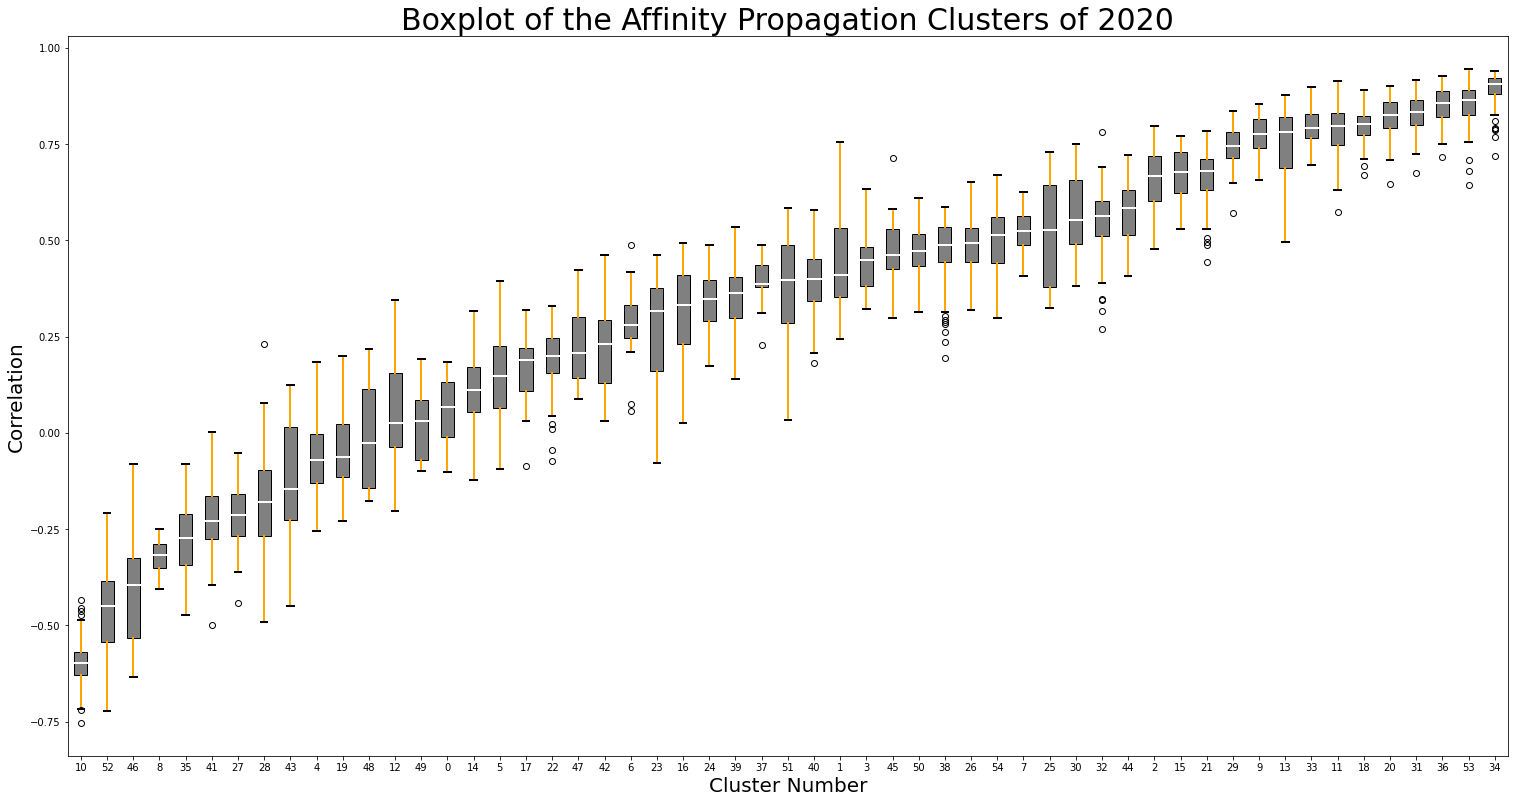

In [234]:
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib as mpl
  
plt.close('all')
plt.figure(1)
plt.clf()
  
fig = plt.figure(figsize =(20, 10))# create figure & 1 axis
ax = fig.add_axes([0,0,1,1])

all_data = []
n_labels = clusters.labels_.max()
for y in range(n_labels+1):
    data = []
    for i in np.argwhere(clusters.labels_ == y):
        data.append(corr_df[i, y][0])
    all_data.append((y,data))


## sort the data by median and return the original index
inital_index =  range(len(all_data))
all_data = sorted(all_data, key=lambda x: np.median(x[1]))
original_index = [x[0] for x in all_data]
all_data = [x[1] for x in all_data]

print("max index", max(original_index))

print("amount of clusters", len(clusters.cluster_centers_indices_))

bp = plt.boxplot(all_data, patch_artist=True)

print("average of all clusters", np.average([len(i) for i in all_data]))
for box in bp["boxes"]:
    box.set( facecolor='gray')
for whisker in bp["whiskers"]:
    whisker.set(color='orange', linewidth=2)
for cap in bp["caps"]:
    cap.set(color='black', linewidth=2)
for median in bp["medians"]:
    median.set(color='white', linewidth=2)
for flier in bp["fliers"]:
    flier.set(marker='o', color='red')
ax.set_xticklabels(original_index)
ax.set_title('Boxplot of the Affinity Propagation Clusters of 2020', fontsize=30)
ax.set_xlabel('Cluster Number', fontsize=20)
ax.set_ylabel('Correlation', fontsize=20)

plt.show()

In [227]:
year = 2020
# get the data for the year
min_year = stockdf.index.min().year
max_year = stockdf.index.max().year
years = [stockdf.loc[f'{year}-01-01':f'{year}-12-31'] for year in range(min_year, max_year + 1)]
year_data = years[year - min_year]

year_variation = np.var(year_data, axis=0).astype(np.float16)
year_data = year_data[year_variation[year_variation > 0].index]

# drop tickers that don't have data for the year
year_data = year_data.dropna(axis=1, how='any')

corr_df = year_data.corr().to_numpy()


NameError: name 'stockdf' is not defined

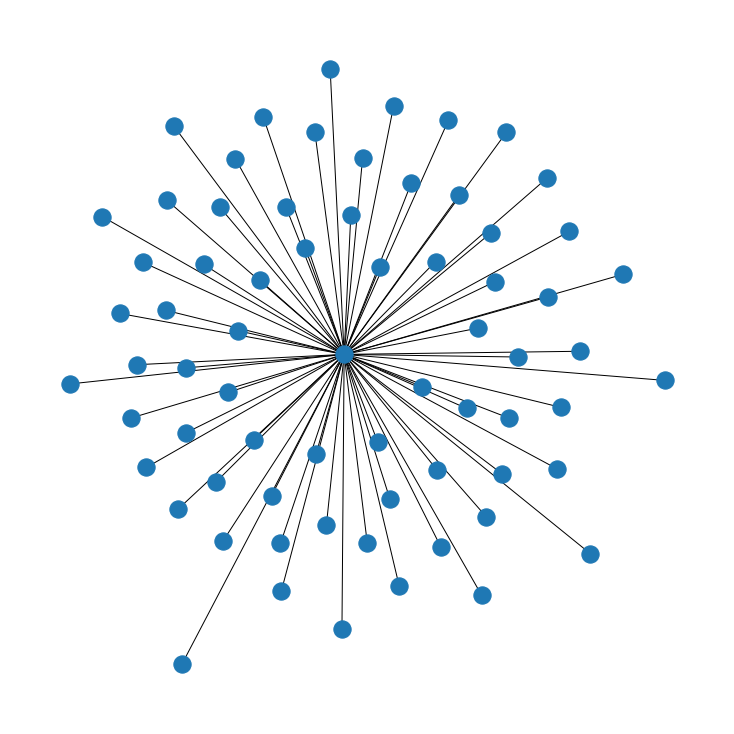

In [122]:
clusters_important = clusters.cluster_centers_indices_
labels = clusters.labels_

sub_clusters = []
sub_corr = []
for y in range(len(clusters_important)+1):
    list_of_nodes = []
    list_of_corr = []
    for i in np.argwhere(labels == y):
        list_of_corr.append(corr_df[i, y][0])
        list_of_nodes.append(i[0])
    sub_clusters.append(list_of_nodes)
    sub_corr.append(list_of_corr)


G = nx.empty_graph()

for i in range(len(clusters_important)):
    main_node = clusters_important[i]
    G.add_node(main_node)
    for y in range(len(sub_clusters[i])):
        if main_node != sub_clusters[i][y]:
            G.add_edge(main_node, sub_clusters[i][y], weight=sub_corr[i][y])
    break

# for i in range(len(clusters_important)):
#     main_node = clusters_important[i]
#     for y in range(len(clusters_important)):
#         if main_node != clusters_important[y]:
#             G.add_edge(main_node,clusters_important[y], weight=corr_df[main_node, clusters_important[y]])

    
fig = plt.figure(figsize =(10,10))# create figure & 1 axis
nx.draw(G, node_size=300, font_size=2, width=1)




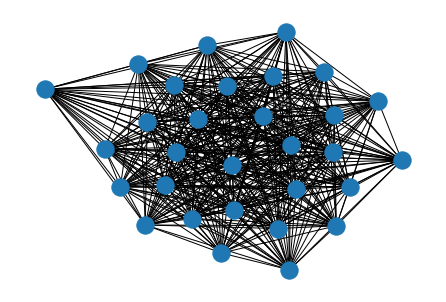

In [143]:

list_of_graphs = []

sub_clusters = []
sub_corr = []
for y in range(len(clusters_important)+1):
    list_of_nodes = []
    list_of_corr = []
    for i in np.argwhere(labels == y):
        list_of_corr.append(corr_df[i, y][0])
        list_of_nodes.append(i[0])
    sub_clusters.append(list_of_nodes)
    sub_corr.append(list_of_corr)




for i in range(len(clusters_important)):
    main_node = clusters_important[i]
    G = nx.empty_graph()
    G.add_node(main_node)
    for y in range(len(sub_clusters[i])):
        if main_node != sub_clusters[i][y]:
            G.add_edge(main_node, sub_clusters[i][y], weight=sub_corr[i][y])
    for y in sub_clusters[i]:
        for z in sub_clusters[i]:
            if z != y:
                G.add_edge(z,y, weight=corr_df[y,z])
    list_of_graphs.append(G)
nx.draw(list_of_graphs[3], node_size=300, font_size=2, width=1)

In [136]:
import pickle
import numpy as np
import networkx as nx
sys.path.append('../data_clean/')
import newClean as nc


In [142]:
def get_indecies_of_labels(year, df_years):
    affinity_prop = nc.read_affinity_propagation_from_year(year)
    clusters_list = nc.read_yearly_clusters(year)
    for i in range(len(df_years)):
        if df_years[i].index.min().year == year:
            stock_df = df_years[i]
    tickers_in_cluster = []
    for i in range(affinity_prop.cluster_centers_indices_.shape[0]):
        tickers_in_cluster.append(np.argwhere(affinity_prop.labels_ == i))
        
    return tickers_in_cluster, clusters_list,affinity_prop, stock_df
    

In [207]:
def page_rank_top_node(tickers_in_cluster,clusters_list, affinity_prop, stock_df):
    most_important_tickers_plural = []
    for i in range(affinity_prop.cluster_centers_indices_.shape[0]):
        current_cluster = clusters_list[i]
        abs_values = [abs(x[2]['weight']) for x in current_cluster.edges(data=True)]
        for i,j in enumerate(current_cluster.edges(data=True)):
            j[2]['weight'] = abs_values[i]
        pagerank = nx.pagerank(current_cluster)
        sorted_ = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
        # print(sorted_)
        top_dog = sorted_[0][0]
        ticker = stock_df.columns[top_dog]
        most_important_tickers_plural.append(ticker)
    return most_important_tickers_plural

In [210]:
def eigenvector_centrality_top_node(tickers_in_cluster,clusters_list, affinity_prop, stock_df):
    most_important_tickers_plural = []
    for i in range(affinity_prop.cluster_centers_indices_.shape[0]):
        current_cluster = clusters_list[i]
        abs_values = [abs(x[2]['weight']) for x in current_cluster.edges(data=True)]
        for i,j in enumerate(current_cluster.edges(data=True)):
            j[2]['weight'] = abs_values[i]
        pagerank = nx.eigenvector_centrality(current_cluster)
        sorted_ = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
        top_dog = sorted_[0][0]
        ticker = stock_df.columns[top_dog]
        most_important_tickers_plural.append(ticker)
    return most_important_tickers_plural

In [226]:
df_years, min_year, max_year = nc.get_data()


tickers_in_cluster, clusters_list,affinity_prop, stock_df =get_indecies_of_labels(2015, df_years)
print(len(page_rank_top_node(tickers_in_cluster,clusters_list, affinity_prop, stock_df)))
print(len(eigenvector_centrality_top_node(tickers_in_cluster,clusters_list, affinity_prop, stock_df)))
katz_centrality_top_node(tickers_in_cluster,clusters_list, affinity_prop, stock_df)

/Users/erlingamundsen/opt/anaconda3/envs/tf26/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AffinityPropagation from version 1.1.3 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


98
98
(5.641972456349697+0j)


/Users/erlingamundsen/opt/anaconda3/envs/tf26/lib/python3.10/site-packages/networkx/linalg/spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())
/Users/erlingamundsen/opt/anaconda3/envs/tf26/lib/python3.10/site-packages/networkx/algorithms/centrality/katz.py:176: RuntimeWarning: overflow encountered in cdouble_scalars
  x[n] = alpha * x[n] + b[n]
/Users/erlingamundsen/opt/anaconda3/envs/tf26/lib/python3.10/site-packages/networkx/algorithms/centrality/katz.py:174: RuntimeWarning: invalid value encountered in cdouble_scalars
  x[nbr] += xlast[n] * G[n][nbr].get(weight, 1)
/Users/erlingamundsen/opt/anaconda3/envs/tf26/lib/python3.10/site-packages/networkx/algorithms/centrality/katz.py:176: RuntimeWarning: invalid value encountered in cdouble_scalars
  x[n] = alpha * x[n] + b[n]


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')